Let's do a 1d Gaussian first where we have mean X=[3] with P=[4]. This means we expect our value to be 3 but we're not quite sure. We are sure that it's ~= +-6 from 3 though, so within -3 to +3. Let's say that we get a reading that says the value is 4 with uncertainty of 1. That's within 1 standard distribution and so is likely. How should we do the conditional to update both the mean and covariance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(0)

# Prior distribution
mu_x = 3
var_x = 4
sigma_x = np.sqrt(var_x)

N = 1_000_000
X_samples = np.random.normal(mu_x, sigma_x, N)

Kalman gain K = sigmax^2 / (sigmax^2 + R) | How suprised should we be?
new mean = mean + K*(z - mean)
new sigma = (1-K)*sigmax^2

K = 4 / (4+1) = 4/5 = 0.8
mean = 3.8
new var = 0.8

new x = N(3.8, 0.8)

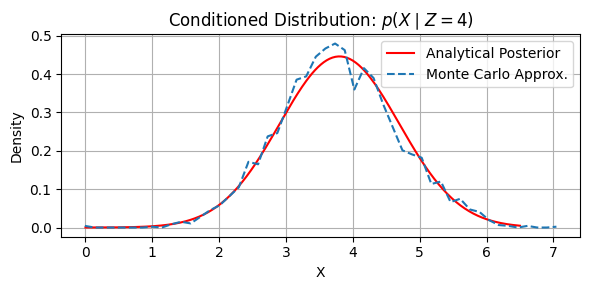

((np.float64(3.7732882650515585), np.float64(0.7794965398379446)),
 (3.8, 0.7999999999999998))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(0)

# Prior distribution
mu_x = 3
var_x = 4
sigma_x = np.sqrt(var_x)

# Measurement noise
var_v = 1
sigma_v = np.sqrt(var_v)

# Observation
z_obs = 4

# --- Monte Carlo Simulation ---
N = 1_000_000
X_samples = np.random.normal(mu_x, sigma_x, N)
Z_samples = X_samples + np.random.normal(0, sigma_v, N)

# Find samples where Z is close to 4 (simulate conditioning)
mask = np.abs(Z_samples - z_obs) < 0.01
X_conditioned = X_samples[mask]

# Compute empirical mean and variance of conditioned samples
empirical_mean = np.mean(X_conditioned)
empirical_var = np.var(X_conditioned)

# Compute analytical posterior
K = var_x / (var_x + var_v)
mu_post = mu_x + K * (z_obs - mu_x)
var_post = (1 - K) * var_x

# Plot
x_vals = np.linspace(0, 6.5, 300)
pdf_post = norm.pdf(x_vals, mu_post, np.sqrt(var_post))
hist_vals, bins = np.histogram(X_conditioned, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(6, 3))
plt.plot(x_vals, pdf_post, label="Analytical Posterior", color="red")
plt.plot(bin_centers, hist_vals, label="Monte Carlo Approx.", linestyle='dashed')
plt.title("Conditioned Distribution: $p(X \\mid Z=4)$")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(empirical_mean, empirical_var), (mu_post, var_post)


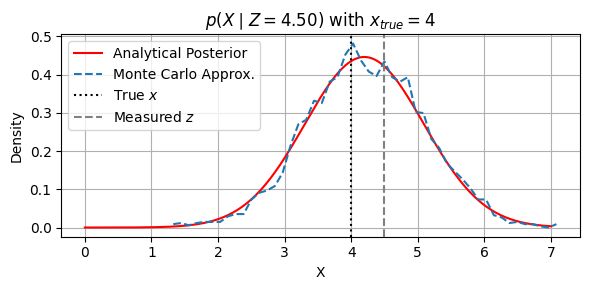

((np.float64(4.216505803684913), np.float64(0.7775452949592269)),
 (4.197371322408986, 0.7999999999999998),
 4.496714153011233)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(42)

# --- True state and measurement noise ---
x_true = 4
R = 1
sigma_R = np.sqrt(R)

# Draw one observed measurement from the true value
z_obs = x_true + np.random.normal(0, sigma_R)

# --- Prior belief about X ---
mu_prior = 3
var_prior = 4
sigma_prior = np.sqrt(var_prior)

# --- Monte Carlo simulation ---
N = 1_000_000
X_samples = np.random.normal(mu_prior, sigma_prior, N)
Z_samples = X_samples + np.random.normal(0, sigma_R, N)

# Condition: keep samples where Z ≈ z_obs
epsilon = 0.01
mask = np.abs(Z_samples - z_obs) < epsilon
X_conditioned = X_samples[mask]

# Compute empirical posterior
empirical_mean = np.mean(X_conditioned)
empirical_var = np.var(X_conditioned)

# Analytical posterior
K = var_prior / (var_prior + R)
mu_post = mu_prior + K * (z_obs - mu_prior)
var_post = (1 - K) * var_prior

# --- Plot ---
x_vals = np.linspace(0, 7, 300)
pdf_post = norm.pdf(x_vals, mu_post, np.sqrt(var_post))
hist_vals, bins = np.histogram(X_conditioned, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(6, 3))
plt.plot(x_vals, pdf_post, label="Analytical Posterior", color="red")
plt.plot(bin_centers, hist_vals, label="Monte Carlo Approx.", linestyle='dashed')
plt.axvline(x_true, color='black', linestyle=':', label="True $x$")
plt.axvline(z_obs, color='gray', linestyle='--', label="Measured $z$")
plt.title(f"$p(X \\mid Z={z_obs:.2f})$ with $x_{{true}} = 4$")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(empirical_mean, empirical_var), (mu_post, var_post), z_obs


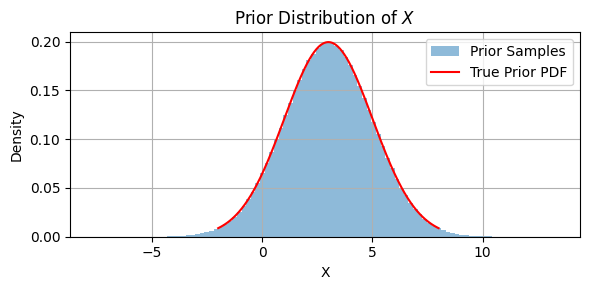

In [ ]:
# Re-import after kernel reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(1)

# --- Prior: X ~ N(3, 4) ---
mu_prior = 3
var_prior = 4
sigma_prior = np.sqrt(var_prior)
N = 100_000

X_samples = np.random.normal(mu_prior, sigma_prior, N)

# Plot the prior distribution
x_vals = np.linspace(-2, 8, 300)
prior_pdf = norm.pdf(x_vals, mu_prior, sigma_prior)

plt.figure(figsize=(6, 3))
plt.hist(X_samples, bins=100, density=True, alpha=0.5, label='Prior Samples')
plt.plot(x_vals, prior_pdf, label='True Prior PDF', color='red')
plt.title("Prior Distribution of $X$")
plt.xlabel("X")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

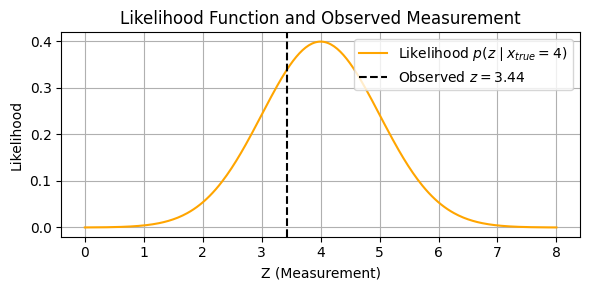

3.435995304183927

In [5]:
# Step 2: simulate true value and draw measurement
x_true = 4
R = 1
sigma_R = np.sqrt(R)

# Simulate one measurement from true state
z_obs = x_true + np.random.normal(0, sigma_R)

# Plot likelihood p(z | x_true)
z_vals = np.linspace(0, 8, 300)
likelihood_pdf = norm.pdf(z_vals, x_true, sigma_R)

plt.figure(figsize=(6, 3))
plt.plot(z_vals, likelihood_pdf, label=f"Likelihood $p(z \\mid x_{{true}}={x_true})$", color="orange")
plt.axvline(z_obs, color='black', linestyle='--', label=f"Observed $z={z_obs:.2f}$")
plt.title("Likelihood Function and Observed Measurement")
plt.xlabel("Z (Measurement)")
plt.ylabel("Likelihood")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

z_obs


<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
C:\Users\jmlgr\AppData\Local\Temp\ipykernel_6860\2822619289.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Posterior Distribution $p(X \mid Z=z_{obs})$")


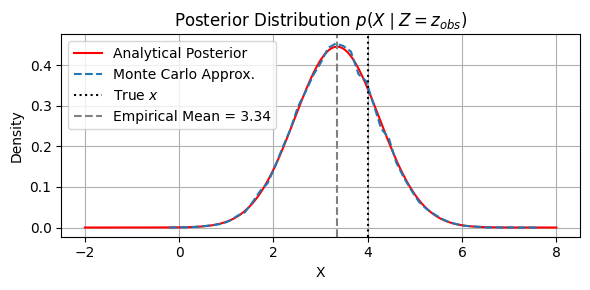

((np.float64(3.3441996725698164), np.float64(0.7917924699389783)),
 (3.3487962433471417, 0.7999999999999998))

In [6]:
# Step 3: Monte Carlo conditioning

# Resample the prior and simulate corresponding measurements
X_mc = np.random.normal(mu_prior, sigma_prior, N)
Z_mc = X_mc + np.random.normal(0, sigma_R, N)

# Condition on Z ≈ z_obs
epsilon = 0.01  # tolerance window for conditioning
mask = np.abs(Z_mc - z_obs) < epsilon
X_conditioned = X_mc[mask]

# Empirical posterior stats
emp_mean = np.mean(X_conditioned)
emp_var = np.var(X_conditioned)

# Analytical posterior using Kalman update
K = var_prior / (var_prior + R)
mu_post = mu_prior + K * (z_obs - mu_prior)
var_post = (1 - K) * var_prior

# Plot
x_vals = np.linspace(-2, 8, 300)
posterior_pdf = norm.pdf(x_vals, mu_post, np.sqrt(var_post))
hist_vals, bins = np.histogram(X_conditioned, bins=50, density=True)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(6, 3))
plt.plot(x_vals, posterior_pdf, label='Analytical Posterior', color='red')
plt.plot(bin_centers, hist_vals, label='Monte Carlo Approx.', linestyle='--')
plt.axvline(x_true, color='black', linestyle=':', label='True $x$')
plt.axvline(emp_mean, color='gray', linestyle='--', label=f'Empirical Mean = {emp_mean:.2f}')
plt.title("Posterior Distribution $p(X \mid Z=z_{obs})$")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(emp_mean, emp_var), (mu_post, var_post)
